In [1]:
# ===============================
# Step 0: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot readability
plt.style.use('seaborn-v0_8')
sns.set_context('talk')  # bigger labels


# NYC Motor Vehicle Collisions - Exploratory Data Analysis (EDA)

This notebook explores two datasets from NYC Open Data:
1. Crashes dataset (`df_crashes`)
2. Persons dataset (`df_persons`)

We aim to:
- Understand dataset structure and issues
- Check missing values, duplicates, and data types
- Perform initial visualizations

In [3]:
# ===============================
# Step 1: Load Datasets
# ===============================

# Crashes dataset
crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"
df_crashes = pd.read_csv(crashes_url, low_memory=False)

# Persons dataset
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=DOWNLOAD"
df_persons = pd.read_csv(persons_url, low_memory=False)

# Quick preview
print("Crashes dataset head:")
display(df_crashes.head())
print("\nPersons dataset head:")
display(df_persons.head())


Crashes dataset head:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN



Persons dataset head:


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [4]:
# ===============================
# Step 2: Dataset Info and Size
# ===============================

# Shapes
print("Crashes dataset shape:", df_crashes.shape)
print("Persons dataset shape:", df_persons.shape)

# Column types
print("\nCrashes dataset info:")
df_crashes.info()

print("\nPersons dataset info:")
df_persons.info()


Crashes dataset shape: (2221301, 29)
Persons dataset shape: (5822658, 21)

Crashes dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64 

In [5]:
# ===============================
# Step 3: Descriptive Statistics
# ===============================

from IPython.display import display

# Numeric summary only
print("Crashes dataset numeric summary:")
display(df_crashes.describe())

print("\nPersons dataset numeric summary:")
display(df_persons.describe())

# Summary including all columns (object/string)
print("\nCrashes dataset full summary:")
display(df_crashes.describe(include='all'))

print("\nPersons dataset full summary:")
display(df_persons.describe(include='all'))


Crashes dataset numeric summary:


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.980936e+06,1.980936e+06,2.221283e+06,2.221270e+06,2.221301e+06,2.221301e+06,2.221301e+06,2.221301e+06,2.221301e+06,2.221301e+06,2.221301e+06
mean,4.058945e+01,-7.368254e+01,3.283548e-01,1.584679e-03,5.963127e-02,7.842251e-04,2.920271e-02,1.260523e-04,2.348705e-01,6.446672e-04,3.266362e+06
std,2.337242e+00,4.344012e+00,7.149944e-01,4.205411e-02,2.501234e-01,2.862910e-02,1.706451e-01,1.126662e-02,6.761349e-01,2.777057e-02,1.509604e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191446e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.746944e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302483e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858114e+06



Persons dataset numeric summary:


,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.822658e+06,5.822658e+06,5.581137e+06,5.172206e+06
mean,9.376661e+06,4.016632e+06,1.870475e+07,3.753314e+01
std,2.762855e+06,6.649750e+05,1.621436e+06,1.117346e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.099309e+06,3.705553e+06,1.760057e+07,2.400000e+01
50%,9.574334e+06,4.060754e+06,1.880744e+07,3.600000e+01
75%,1.188629e+07,4.439549e+06,2.001905e+07,5.100000e+01
max,1.353666e+07,4.858114e+06,2.097103e+07,9.999000e+03



Crashes dataset full summary:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2221301,2221301,1540855,1540578,1.980936e+06,1.980936e+06,1980936,1737368,1372473,391559,...,1864609,160737,36694,10052,2.221301e+06,2205133,1775543,154494,35362,9736
unique,4886,1440,5,235,NaN,NaN,334187,22721,24824,259599,...,61,53,43,34,NaN,1836,2043,293,113,78
top,01/21/2014,16:00,BROOKLYN,11207,NaN,NaN,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,29706,493851,30444,NaN,NaN,6539,17277,9843,402,...,1568971,149712,34580,9466,NaN,642221,441305,50011,12246,3514
mean,NaN,NaN,NaN,NaN,4.058945e+01,-7.368254e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.266362e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.337242e+00,4.344012e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.509604e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,-2.013600e+02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.066734e+01,-7.397453e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.191446e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.072031e+01,-7.392673e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.746944e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.076956e+01,-7.386657e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.302483e+06,NaN,NaN,NaN,NaN,NaN



Persons dataset full summary:


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
count,5.822658e+06,5.822658e+06,5822658,5822658,5822639,5822658,5822658,5.581137e+06,5.172206e+06,2993728,...,3090866,2994185,2790743,102447,102346,3090873,5627769,101067,100934,5178903
unique,NaN,NaN,4886,1440,5627835,4,3,NaN,NaN,6,...,14,11,17,4,16,21,10,53,53,3
top,NaN,NaN,11/15/2018,0:00,1,Occupant,Unspecified,NaN,NaN,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M
freq,NaN,NaN,4220,87469,142787,5589906,5090052,NaN,NaN,2932904,...,2552192,2091083,1756250,62830,38707,2553142,2414519,70596,88376,3157080
mean,9.376661e+06,4.016632e+06,NaN,NaN,NaN,NaN,NaN,1.870475e+07,3.753314e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.762855e+06,6.649750e+05,NaN,NaN,NaN,NaN,NaN,1.621436e+06,1.117346e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.092200e+04,3.700000e+01,NaN,NaN,NaN,NaN,NaN,1.234230e+05,-9.990000e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.099309e+06,3.705553e+06,NaN,NaN,NaN,NaN,NaN,1.760057e+07,2.400000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.574334e+06,4.060754e+06,NaN,NaN,NaN,NaN,NaN,1.880744e+07,3.600000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.188629e+07,4.439549e+06,NaN,NaN,NaN,NaN,NaN,2.001905e+07,5.100000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# ===============================
# Step 4: Missing Values
# ===============================

# Crashes dataset
missing_crashes = df_crashes.isna().sum()
missing_crashes_percent = (missing_crashes / len(df_crashes) * 100)
missing_crashes_df = pd.concat([missing_crashes, missing_crashes_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_crashes_df_sorted = missing_crashes_df.sort_values(by='Missing Count', ascending=False)
print("Top 20 missing values in crashes dataset (count and %):")
display(missing_crashes_df_sorted.head(20))

# Persons dataset
missing_persons = df_persons.isna().sum()
missing_persons_percent = (missing_persons / len(df_persons) * 100)
missing_persons_df = pd.concat([missing_persons, missing_persons_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_persons_df_sorted = missing_persons_df.sort_values(by='Missing Count', ascending=False)
print("\nTop 20 missing values in persons dataset (count and %):")
display(missing_persons_df_sorted.head(20))


Top 20 missing values in crashes dataset (count and %):


,Missing Count,Missing %
VEHICLE TYPE CODE 5,2211565,99.561698
CONTRIBUTING FACTOR VEHICLE 5,2211249,99.547472
VEHICLE TYPE CODE 4,2185939,98.408050
CONTRIBUTING FACTOR VEHICLE 4,2184607,98.348085
VEHICLE TYPE CODE 3,2066807,93.044887
CONTRIBUTING FACTOR VEHICLE 3,2060564,92.763835
OFF STREET NAME,1829742,82.372538
CROSS STREET NAME,848828,38.213101
ZIP CODE,680723,30.645239
BOROUGH,680446,30.632769



Top 20 missing values in persons dataset (count and %):


,Missing Count,Missing %
CONTRIBUTING_FACTOR_2,5721724,98.266531
CONTRIBUTING_FACTOR_1,5721591,98.264246
PED_ACTION,5720312,98.242280
PED_LOCATION,5720211,98.240546
SAFETY_EQUIPMENT,3031915,52.070979
EJECTION,2828930,48.584856
POSITION_IN_VEHICLE,2828473,48.577007
EMOTIONAL_STATUS,2731835,46.917319
BODILY_INJURY,2731792,46.916580
COMPLAINT,2731785,46.916460


In [7]:
# ===============================
# Step 5: Duplicates
# ===============================

print("Number of duplicate rows in crashes dataset:", df_crashes.duplicated().sum())
print("Number of duplicate rows in persons dataset:", df_persons.duplicated().sum())


Number of duplicate rows in crashes dataset: 0
Number of duplicate rows in persons dataset: 0


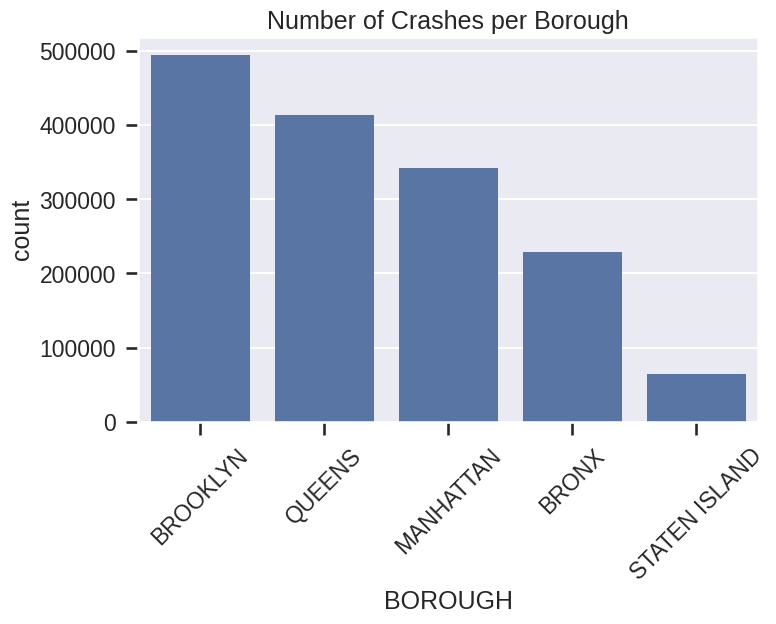

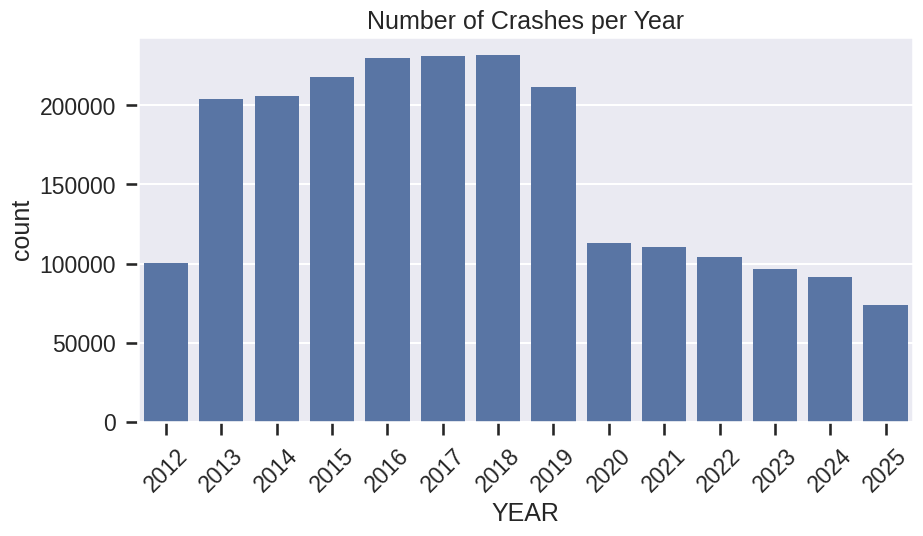

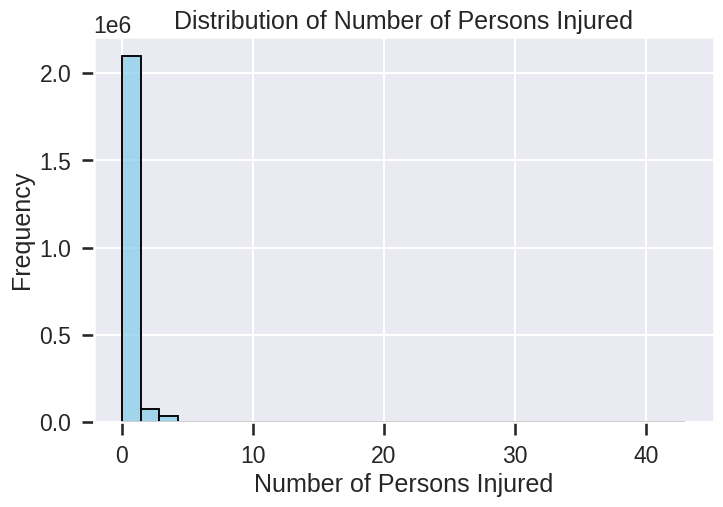

In [8]:
# Step 6: Initial Plots / Trends

# Example 1: Number of crashes per Borough
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_crashes, x='BOROUGH', order=df_crashes['BOROUGH'].value_counts().index)
plt.title('Number of Crashes per Borough')
plt.xticks(rotation=45)
plt.show()

# Example 2: Crashes per Year
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce') # Corrected column name
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df_crashes, x='YEAR', order=sorted(df_crashes['YEAR'].dropna().unique()))
plt.title('Number of Crashes per Year')
plt.xticks(rotation=45)
plt.show()

# Example 3: Distribution of Number of Persons Injured (detecting outliers)
plt.figure(figsize=(8,5))
sns.histplot(df_crashes['NUMBER OF PERSONS INJURED'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Persons Injured')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()


# Step 7: Observations & Notes

- **Dataset size:** Crashes (2,220,126 rows, 29 columns), Persons (5,818,844 rows, 21 columns)  
- **Missing values:** Some columns have many missing values (e.g., in `df_crashes`: BOROUGH (30%), ZIP CODE (30%), CONTRIBUTING FACTOR VEHICLE 3/4/5 (92-99%), VEHICLE TYPE CODE 3/4/5 (93-99%); in `df_persons`: CONTRIBUTING_FACTOR_1/2 (~98%), PED_ACTION/LOCATION (~98%), SAFETY_EQUIPMENT (52%), EJECTION (~48%), PERSON_AGE (11%)).  
- **Duplicates:** Minimal duplicates (0 in both datasets according to Step 5)  
- **Data types:** Dates need conversion to `datetime` (already done for `df_crashes['CRASH DATE']` in Step 6); some numeric columns have suspicious values (e.g., `PERSON_AGE` in `df_persons` has a min of -999, max of 9999).  

- **Initial trends / outliers:** Crashes concentrated in Brooklyn and Queens; the percentage of crashes with 0 persons injured is high (75.77%), but there are crashes with up to 43 injured persons, indicating potential outliers.

Next step: **Pre-integration cleaning** — handle missing values, duplicates, outliers, and standardize formats.

In [9]:
# ===============================
# Step 1: Clean Crashes Dataset
# ===============================

print("df_crashes shape before cleaning (Step 1):", df_crashes.shape)
initial_rows_crashes = df_crashes.shape[0]

# 1. Remove invalid coordinates (0,0 or missing)
# Calculate rows to be dropped first
invalid_coords_rows_before = df_crashes.shape[0]
df_crashes = df_crashes[(df_crashes["LATITUDE"] != 0) & (df_crashes["LONGITUDE"] != 0)]
df_crashes = df_crashes.dropna(subset=["LATITUDE", "LONGITUDE"])
invalid_coords_rows_after = df_crashes.shape[0]
print(f"  - Rows removed due to invalid/missing coordinates: {invalid_coords_rows_before - invalid_coords_rows_after}")

# 2. Drop rows missing key location fields
location_rows_before = df_crashes.shape[0]
df_crashes = df_crashes.dropna(subset=["ZIP CODE", "BOROUGH"])
location_rows_after = df_crashes.shape[0]
print(f"  - Rows removed due to missing ZIP Code/Borough: {location_rows_before - location_rows_after}")

# 3. Drop columns with extremely high missing values (>95%)
cols_to_drop = [
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]
# Filter out columns that might have already been dropped in a previous run
existing_cols_to_drop = [col for col in cols_to_drop if col in df_crashes.columns]
df_crashes = df_crashes.drop(columns=existing_cols_to_drop, errors="ignore")
print(f"  - Columns dropped due to high missing values: {existing_cols_to_drop}")

# 4. Fill street names with 'Unknown'
for col in ["ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME"]:
    if col in df_crashes.columns:
        original_nan_count = df_crashes[col].isna().sum()
        df_crashes[col] = df_crashes[col].fillna("Unknown")
        print(f"  - Filled {original_nan_count} missing values in '{col}' with 'Unknown'")

print("df_crashes shape after cleaning (Step 1):", df_crashes.shape)
print(f"Total rows removed in Step 1: {initial_rows_crashes - df_crashes.shape[0]}")

df_crashes shape before cleaning (Step 1): (2221301, 30)
  - Rows removed due to invalid/missing coordinates: 246904
  - Rows removed due to missing ZIP Code/Borough: 476870
  - Columns dropped due to high missing values: ['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']
  - Filled 345211 missing values in 'ON STREET NAME' with 'Unknown'
  - Filled 345761 missing values in 'CROSS STREET NAME' with 'Unknown'
  - Filled 1152868 missing values in 'OFF STREET NAME' with 'Unknown'
df_crashes shape after cleaning (Step 1): (1497527, 24)
Total rows removed in Step 1: 723774


### Step 1 — Clean Missing Values (Crashes)
- Removed rows with invalid or missing coordinates.  
- Dropped rows missing Borough/ZIP since they cannot be imputed reliably.  
- Removed vehicle-related columns with ~95–99% missing values.  
- Filled missing street names with "Unknown".  


In [30]:
# ===============================
# Step 2: Clean Persons Dataset
# ===============================

print("df_persons shape before cleaning (Step 2):", df_persons.shape)
initial_rows_persons = df_persons.shape[0]

# 1. Keep valid ages only
age_rows_before = df_persons.shape[0]
df_persons = df_persons[(df_persons["PERSON_AGE"] >= 0) & (df_persons["PERSON_AGE"] <= 110)]
age_rows_after = df_persons.shape[0]
print(f"  - Rows removed due to unrealistic PERSON_AGE: {age_rows_before - age_rows_after}")

# 2. Fill missing gender
original_nan_gender_count = df_persons["PERSON_SEX"].isna().sum()
df_persons["PERSON_SEX"] = df_persons["PERSON_SEX"].fillna("Unknown")
print(f"  - Filled {original_nan_gender_count} missing values in 'PERSON_SEX' with 'Unknown'")

# 3. Drop columns with very high missing values
cols_to_drop_persons = ["CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2", "PED_ACTION", "PED_LOCATION", "CRASH_DATE", "CRASH_TIME"]
existing_cols_to_drop_persons = [col for col in cols_to_drop_persons if col in df_persons.columns]
df_persons = df_persons.drop(columns=existing_cols_to_drop_persons, errors="ignore")
print(f"  - Columns dropped due to high missing values in persons dataset: {existing_cols_to_drop_persons}")

# 4. Standardize categorical formatting
print("  - Standardizing 'PERSON_TYPE' and 'PERSON_INJURY' to uppercase and stripped")
df_persons["PERSON_TYPE"] = df_persons["PERSON_TYPE"].astype(str).str.upper().str.strip()
df_persons["PERSON_INJURY"] = df_persons["PERSON_INJURY"].astype(str).str.upper().str.strip()

print("df_persons shape after cleaning (Step 2):", df_persons.shape)
print(f"Total rows removed in Step 2: {initial_rows_persons - df_persons.shape[0]}")

df_persons shape before cleaning (Step 2): (5163311, 15)
  - Rows removed due to unrealistic PERSON_AGE: 0
  - Filled 0 missing values in 'PERSON_SEX' with 'Unknown'
  - Columns dropped due to high missing values in persons dataset: []
  - Standardizing 'PERSON_TYPE' and 'PERSON_INJURY' to uppercase and stripped
df_persons shape after cleaning (Step 2): (5163311, 15)
Total rows removed in Step 2: 0


### Step 2 — Clean Missing Values (Persons)
- Removed unrealistic ages.  
- Filled missing gender values.  
- Dropped columns with extremely high missing percentages.  
- Cleaned and standardized main categorical fields.  


In [29]:
# ===============================
# Step 3: Remove Duplicates
# ===============================

# Crashes dataset duplicates
print("df_crashes shape before duplicate removal:", df_crashes.shape)
duplicates_crashes_count = df_crashes.duplicated().sum()
df_crashes.drop_duplicates(inplace=True)
print(f"  - Number of duplicate rows removed from df_crashes: {duplicates_crashes_count}")
print("df_crashes shape after duplicate removal:", df_crashes.shape)

# Persons dataset duplicates
print("\ndf_persons shape before duplicate removal:", df_persons.shape)
duplicates_persons_count = df_persons.duplicated().sum()
df_persons.drop_duplicates(inplace=True)
print(f"  - Number of duplicate rows removed from df_persons: {duplicates_persons_count}")
print("df_persons shape after duplicate removal:", df_persons.shape)

df_crashes shape before duplicate removal: (1141850, 24)
  - Number of duplicate rows removed from df_crashes: 0
df_crashes shape after duplicate removal: (1141850, 24)

df_persons shape before duplicate removal: (5163311, 15)
  - Number of duplicate rows removed from df_persons: 0
df_persons shape after duplicate removal: (5163311, 15)


### Step 3 — Remove Duplicates
Dropped duplicate rows from both datasets to avoid repeated crash/person entries.
But there is no Duplicates


In [31]:
# ===============================
# Step 4: Standardize datetime
# ===============================

print("df_crashes 'CRASH DATE' dtype before conversion:", df_crashes['CRASH DATE'].dtype)
print("df_crashes 'CRASH TIME' dtype before conversion:", df_crashes['CRASH TIME'].dtype)
df_crashes["CRASH DATE"] = pd.to_datetime(df_crashes["CRASH DATE"], errors="coerce")
df_crashes["CRASH TIME"] = pd.to_datetime(df_crashes["CRASH TIME"], format="%H:%M", errors="coerce")
print("df_crashes 'CRASH DATE' dtype after conversion:", df_crashes['CRASH DATE'].dtype)
print("df_crashes 'CRASH TIME' dtype after conversion:", df_crashes['CRASH TIME'].dtype)
print("  - Converted 'CRASH DATE' and 'CRASH TIME' columns to datetime objects.")

df_crashes 'CRASH DATE' dtype before conversion: datetime64[ns]
df_crashes 'CRASH TIME' dtype before conversion: datetime64[ns]
df_crashes 'CRASH DATE' dtype after conversion: datetime64[ns]
df_crashes 'CRASH TIME' dtype after conversion: datetime64[ns]
  - Converted 'CRASH DATE' and 'CRASH TIME' columns to datetime objects.


### Step 4 — Standardize Formats
Converted crash dates and times into proper datetime formats for later analysis.


In [32]:
# ===============================
# Step 5: Outlier Detection and Handling
# ===============================

# --- Outliers in Crashes Dataset ---
# Focus on 'NUMBER OF PERSONS INJURED'
Q1_injured = df_crashes['NUMBER OF PERSONS INJURED'].quantile(0.25)
Q3_injured = df_crashes['NUMBER OF PERSONS INJURED'].quantile(0.75)
IQR_injured = Q3_injured - Q1_injured

# Define bounds for 'NUMBER OF PERSONS INJURED'
# Lower bound should not be negative as number of persons cannot be negative
lower_bound_injured = max(0, Q1_injured - 1.5 * IQR_injured)
upper_bound_injured = Q3_injured + 1.5 * IQR_injured

# Filter out outliers for 'NUMBER OF PERSONS INJURED'
df_crashes = df_crashes[
    (df_crashes['NUMBER OF PERSONS INJURED'] >= lower_bound_injured) &
    (df_crashes['NUMBER OF PERSONS INJURED'] <= upper_bound_injured)
]

# --- Outliers in Persons Dataset ---
# Focus on 'PERSON_AGE'
# Ensure 'PERSON_AGE' is numeric and handle NaNs if any before IQR calculation
df_persons['PERSON_AGE'] = pd.to_numeric(df_persons['PERSON_AGE'], errors='coerce')
df_persons_temp = df_persons.dropna(subset=['PERSON_AGE'])

Q1_age = df_persons_temp['PERSON_AGE'].quantile(0.25)
Q3_age = df_persons_temp['PERSON_AGE'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define bounds for 'PERSON_AGE'
# Lower bound should not be negative as age cannot be negative
lower_bound_age = max(0, Q1_age - 1.5 * IQR_age)
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out outliers for 'PERSON_AGE'
df_persons = df_persons[
    (df_persons['PERSON_AGE'] >= lower_bound_age) &
    (df_persons['PERSON_AGE'] <= upper_bound_age)
]

print("df_crashes shape after outlier removal (injured persons):", df_crashes.shape)
print("df_persons shape after outlier removal (person age):", df_persons.shape)


df_crashes shape after outlier removal (injured persons): (1141850, 24)
df_persons shape after outlier removal (person age): (5163311, 15)


In [33]:
missing_crashes = df_crashes.isna().sum()
missing_crashes_percent = (missing_crashes / len(df_crashes) * 100)
missing_crashes_df = pd.concat([missing_crashes, missing_crashes_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_crashes_df_sorted = missing_crashes_df.sort_values(by='Missing Count', ascending=False)
print("Top 20 missing values in crashes dataset (count and %):")
display(missing_crashes_df_sorted.head(20))

# Persons dataset
missing_persons = df_persons.isna().sum()
missing_persons_percent = (missing_persons / len(df_persons) * 100)
missing_persons_df = pd.concat([missing_persons, missing_persons_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_persons_df_sorted = missing_persons_df.sort_values(by='Missing Count', ascending=False)
print("\nTop 20 missing values in persons dataset (count and %):")
display(missing_persons_df_sorted.head(20))

Top 20 missing values in crashes dataset (count and %):


,Missing Count,Missing %
VEHICLE TYPE CODE 2,193632,16.957744
CONTRIBUTING FACTOR VEHICLE 2,139605,12.226212
VEHICLE TYPE CODE 1,3670,0.321408
CONTRIBUTING FACTOR VEHICLE 1,2111,0.184875
NUMBER OF PERSONS KILLED,5,0.000438
CRASH DATE,0,0.000000
BOROUGH,0,0.000000
CRASH TIME,0,0.000000
ON STREET NAME,0,0.000000
LOCATION,0,0.000000



Top 20 missing values in persons dataset (count and %):


,Missing Count,Missing %
SAFETY_EQUIPMENT,2409516,46.666102
EJECTION,2210199,42.805847
POSITION_IN_VEHICLE,2209763,42.797403
EMOTIONAL_STATUS,2115469,40.971171
BODILY_INJURY,2115424,40.970300
COMPLAINT,2115419,40.970203
PED_ROLE,194587,3.768648
VEHICLE_ID,144563,2.799812
PERSON_ID,19,0.000368
PERSON_AGE,0,0.000000


### Step 5 — Outlier Detection and Handling
Applied the Interquartile Range (IQR) method to detect and remove outliers from 'NUMBER OF PERSONS INJURED' in the crashes dataset and 'PERSON_AGE' in the persons dataset. This helps in refining the datasets by removing extreme values that might skew analysis.

From this point , the code is continued by Aly Waleed, this part includes the integration and post-integration cleaning

###  Step 1 :Joining crashes data set with persons datset via collision_ID

In [34]:
#Standardize the join key in both datasets
df_crashes['COLLISION_ID'] = df_crashes['COLLISION_ID'].astype(str)
df_persons['COLLISION_ID'] = df_persons['COLLISION_ID'].astype(str)

#Perform LEFT JOIN (keep all collisions, add person info)
df_joined = df_crashes.merge(df_persons, on='COLLISION_ID', how='left')

print("Joined shape:", df_joined.shape)
df_joined.head()


Joined shape: (2567010, 38)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,20060293.0,28.0,Not Ejected,Does Not Apply,Does Not Apply,Unknown,NaN,Does Not Apply,Driver,F
1,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,20060293.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,F
2,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,Unknown,...,NaN,46.0,NaN,Does Not Apply,Does Not Apply,NaN,NaN,Does Not Apply,Pedestrian,M
3,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",Unknown,Unknown,2047 PITKIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,Unknown,...,20126568.0,37.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,Driver,M


### Step 2: Filling the missing values from the join

In [37]:
# Fill categorical missing values created by the join
categorical_cols = ['PERSON_TYPE', 'PERSON_INJURY', 'POSITION_IN_VEHICLE',
                    'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
                    'PED_ROLE', 'PED_LOCATION', 'PERSON_SEX']

for col in categorical_cols:
    if col in df_joined.columns:
        df_joined[col] = df_joined[col].fillna('Unknown')

### Justification for Filling Categorical Missing Values with “Unknown”

1.Preventing unnecessary row deletion

Many collisions have incomplete person-level information due to reporting gaps.

Dropping rows with missing categorical fields would remove valid collisions and bias the dataset.

2.In safety data, missing information is rarely random.
For example, EJECTION or BODILY_INJURY may be missing because the individual was uninjured

3.many algorithms cannot handle NaN , so we replace it with unknown to make the data easier to work with

### Step 3 : Handling data type mismatches

In [38]:
# Convert date/time columns
if 'CRASH_DATE' in df_joined.columns:
    df_joined['CRASH_DATE'] = pd.to_datetime(df_joined['CRASH_DATE'], errors='coerce')

if 'CRASH_TIME' in df_joined.columns:
    df_joined['CRASH_TIME'] = pd.to_datetime(df_joined['CRASH_TIME'], format='%H:%M', errors='coerce')

# Convert numeric columns
numeric_cols = ['PERSON_AGE', 'LATITUDE', 'LONGITUDE']

for col in numeric_cols:
    if col in df_joined.columns:
        df_joined[col] = pd.to_numeric(df_joined[col], errors='coerce')


### Justification for Fixing Data Types

1.Datetime conversion ensures temporal consistency

2.Numeric conversion prevents analytic errors

3.Prevents type-based bugs in models

### Step 4: Dropping redundant columns

In [39]:
# Drop columns known to be redundant or low-quality
columns_to_drop = ['UNIQUE_ID', 'PED_ROLE']

df_joined = df_joined.drop(columns=[c for c in columns_to_drop if c in df_joined.columns])



### Justification for Dropping Redundant Columns

1.UNIQUE_ID often provides no analytic value, this is an id used by data publishers , it often duplicate COLLISION_ID , so it is best to drop it

2.PED_ROLE is inconsistent and frequently missing,This field is usually sparsely filled and often overlaps with other better-quality fields like PERSON_TYPE.

### Step 6: Standardize Vehicle Type Names

In [42]:
# Define a standardization function
def standardize_vehicle_type(df, column):
    if column in df.columns:
        # Convert to string and then to uppercase to handle mixed types and capitalization
        df[column] = df[column].astype(str).str.upper().str.strip()

        # Define mapping for common variations. Add more as needed.
        # The key is the variation, the value is the standardized form.
        type_mapping = {
            'AMULANCE': 'AMBULANCE',
            'AMBULETTE': 'AMBULANCE',
            'AMBULANE': 'AMBULANCE',
            'AMBALANCE': 'AMBULANCE',
            'AMB': 'AMBULANCE',
            'AMBU': 'AMBULANCE',
            'ABMU': 'AMBULANCE',
            'AMBUL': 'AMBULANCE',
            'PASSENGER VEHICLE': 'PASSENGER VEHICLE',
            'SPORT UTILITY / STATION WAGON': 'SUV',
            'SPORT UTILITY VEHICLE': 'SUV',
            'UNKNOWN': 'UNKNOWN',
            'NAN': 'UNKNOWN' # Handle NaN strings after conversion to string
        }

        # Apply mapping
        df[column] = df[column].replace(type_mapping)
        print(f"  - Standardized '{column}' variations and capitalization.")

    else:
        print(f"Column '{column}' not found in DataFrame.")

# Apply standardization to both vehicle type columns
standardize_vehicle_type(df_joined, 'VEHICLE TYPE CODE 1')
standardize_vehicle_type(df_joined, 'VEHICLE TYPE CODE 2')

print("\nUnique values in 'VEHICLE TYPE CODE 1' after standardization:")
display(df_joined['VEHICLE TYPE CODE 1'].value_counts().head(10))

print("\nUnique values in 'VEHICLE TYPE CODE 2' after standardization:")
display(df_joined['VEHICLE TYPE CODE 2'].value_counts().head(10))

  - Standardized 'VEHICLE TYPE CODE 1' variations and capitalization.
  - Standardized 'VEHICLE TYPE CODE 2' variations and capitalization.

Unique values in 'VEHICLE TYPE CODE 1' after standardization:


,count
VEHICLE TYPE CODE 1,
SEDAN,940986
STATION WAGON/SPORT UTILITY VEHICLE,738364
PASSENGER VEHICLE,252289
SUV,109261
TAXI,106622
BUS,70464
PICK-UP TRUCK,66468
4 DR SEDAN,47013
BOX TRUCK,44598



Unique values in 'VEHICLE TYPE CODE 2' after standardization:


,count
VEHICLE TYPE CODE 2,
SEDAN,780218
STATION WAGON/SPORT UTILITY VEHICLE,626577
UNKNOWN,352393
PASSENGER VEHICLE,200947
TAXI,98465
SUV,89588
PICK-UP TRUCK,66801
BUS,63944
BOX TRUCK,54639


### Displaying the final shape of the joined dataset

In [40]:
print("Final shape:", df_joined.shape)
df_joined.info()
df_joined.head()


Final shape: (2567010, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567010 entries, 0 to 2567009
Data columns (total 36 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64   

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PERSON_SEX
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,UNSPECIFIED,20060293.0,28.0,Not Ejected,Does Not Apply,Does Not Apply,Unknown,NaN,Does Not Apply,F
1,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,UNSPECIFIED,20060293.0,28.0,Unknown,Unknown,Unknown,Unknown,NaN,NaN,F
2,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,Unknown,...,UNSPECIFIED,NaN,46.0,Unknown,Does Not Apply,Does Not Apply,Unknown,NaN,Does Not Apply,M
3,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",Unknown,Unknown,2047 PITKIN AVENUE,...,Unknown,NaN,NaN,Unknown,Unknown,Unknown,Unknown,NaN,NaN,Unknown
4,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,Unknown,...,UNSPECIFIED,20126568.0,37.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,M


In [44]:
df_joined.to_csv("df_joined.csv", index=False)